# two_point_correlation_bf
An example for the use of porespy.metrics.two_point_correlation_bf

Calculates the two-point correlation function using brute-force.

## Import packages

In [1]:
import porespy as ps
import matplotlib.pyplot as plt

ps.visualization.set_mpl_style()

## Create image and variables:

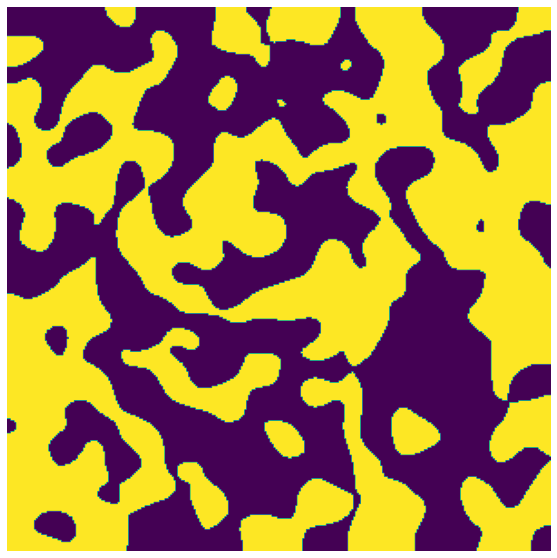

In [2]:
skel = ps.generators.blobs(shape=[300, 300])
im = ps.filters.prune_branches(skel)

plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(im)

#default values:
spacing = 10

Output is a tuple with elements probability and distance

## Apply metric function:

### spacing

In [3]:
x = ps.metrics.two_point_correlation_bf(im, spacing)
xx = ps.metrics.two_point_correlation_bf(im, 5)



Plot results:

Text(0.5, 1.0, 'Spacing = 5: Probability vs. Distance')

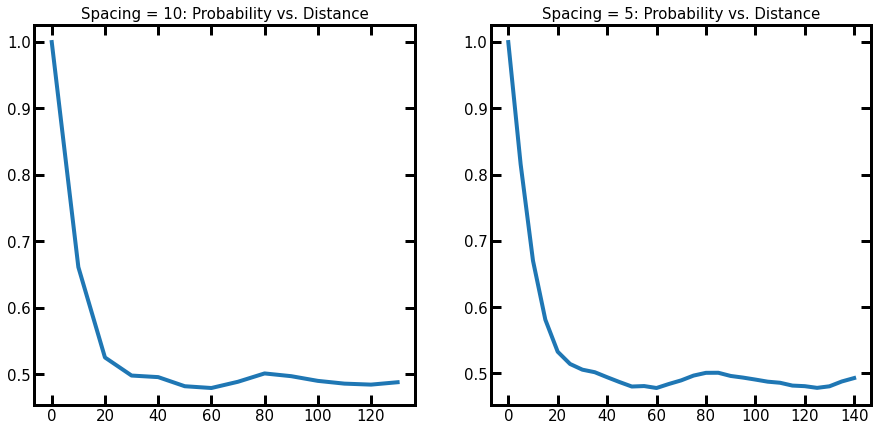

In [4]:
fig, ax = plt.subplots(1, 2, figsize=[15, 7]);
ax[0].plot(x.distance, x.probability)
ax[1].plot(xx.distance, xx.probability)
ax[0].set_title("Spacing = 10: Probability vs. Distance")
ax[1].set_title("Spacing = 5: Probability vs. Distance")